## PYTHON FOR DATA ANALYSIS

In [87]:
#Imports de librairies
import pandas as pd
import numpy as np
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn import datasets

### Téléchargement de la base de donnée

In [88]:
#import de data 

path ="C:\Users\Black Mamba\Documents\Python Scripts\MagicGammaTelescope.csv"

#Vérification du chemin 
assert(os.path.isfile(path))


In [89]:
#Création de la dataframe
dataf = pd.read_csv(path, index_col=0, parse_dates=True)

In [90]:
dataf.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.052,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [91]:
#Pour des résutats non ordonné nous allons utilisé la fonction random pour melanger aléatoirement les données  
dataf_rand=dataf.iloc[np.random.permutation(len(dataf))]
dataf_rand.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
42.5896,27.5117,3.3595,0.2287,0.1199,-22.1561,47.4757,-17.2455,41.5633,237.3838,h
45.7794,16.0074,2.9761,0.2779,0.1421,-13.6447,-26.4445,-9.6365,0.6344,242.5300,g
28.212,16.2969,2.5705,0.3199,0.1626,0.3502,-20.8862,13.1331,10.7703,255.2640,g
23.0347,12.2928,2.3883,0.6094,0.4151,13.5323,18.1708,10.1494,89.1927,161.4280,g
70.3382,46.8813,3.1054,0.2021,0.1317,-34.5090,-78.5341,-34.8005,49.9159,231.6019,h


In [92]:
#On re-strat l'index
df=dataf_rand.reset_index(drop = True)
df.head

<bound method DataFrame.head of         fLenght  fWidth   fSize  fConc1     fAsym   fM3Long  FM3Trans  \
0       27.5117  3.3595  0.2287  0.1199  -22.1561   47.4757  -17.2455   
1       16.0074  2.9761  0.2779  0.1421  -13.6447  -26.4445   -9.6365   
2       16.2969  2.5705  0.3199  0.1626    0.3502  -20.8862   13.1331   
3       12.2928  2.3883  0.6094  0.4151   13.5323   18.1708   10.1494   
4       46.8813  3.1054  0.2021  0.1317  -34.5090  -78.5341  -34.8005   
5       16.4912  2.4133  0.4788  0.3185   18.6452   17.5771   -6.8352   
6       20.8588  2.8149  0.3369  0.1968   26.5421   26.9431   14.3703   
7       11.7899  2.2492  0.7099  0.3577  -15.1386    4.4607   11.4721   
8       21.0441  3.2918  0.1808  0.0922   19.7735   22.8269    6.0561   
9       17.5606  2.5192  0.3661  0.2012    4.9367  -22.6928   14.3344   
10      11.8873  2.4631  0.5508  0.3391   26.0955   10.6926   -7.5324   
11      27.7732  3.2853  0.3118  0.1852  -79.2715 -102.7032  -19.8884   
12      18.1279  2.

### Data-préparation

In [93]:
#d'après le pdf nous savons que le type de donnée est réel 
#néanmoins nous pouvons le tester comme suit

df.dtypes

fLenght     float64
fWidth      float64
fSize       float64
fConc1      float64
fAsym       float64
fM3Long     float64
FM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [94]:
#avec la colonne class (object type) 
#teste du level pour g et h

for level in ['class']:
    print("Levels for '{1}' : {0}".format(level,df[level].unique()))

Levels for '['h' 'g']' : class


In [57]:
#d'après le datacenter :
# "In the real data, the h class represents the majority of the events.""
#tenons compte de ces informations 
df['Class'] = df['class'].map({'g':1 , 'h' : 0})

In [58]:
#"g" prendra pour valeur 1 et "h" prendra pour valeur 0: 
#On enregistre les étiquettes des classes que nous devons prédire
#dans une differente variable .
df_class = df['class'].values

### Visualisation des données

In [ ]:
#Ratio du plus grand pixel par rapport à fSize

In [100]:
positifconc = df.fConc1>0.1

In [101]:
negatifconc = df.fConc1<0.1

In [102]:
nb_negatifconc = df[negatifconc]["fConc1"].count()
nb_positifconc = df[positifconc]["fConc1"].count()

In [103]:
nb_negatifconc, nb_positifconc 

(2710, 16305)

In [104]:
DataBase = df

In [105]:
DataBase["positif"] = positifconc

In [106]:
DataBase.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class_g,class_h,positif
0,27.5117,3.3595,0.2287,0.1199,-22.1561,47.4757,-17.2455,41.5633,237.3838,0,1,True
1,16.0074,2.9761,0.2779,0.1421,-13.6447,-26.4445,-9.6365,0.6344,242.5300,1,0,True
2,16.2969,2.5705,0.3199,0.1626,0.3502,-20.8862,13.1331,10.7703,255.2640,1,0,True
3,12.2928,2.3883,0.6094,0.4151,13.5323,18.1708,10.1494,89.1927,161.4280,1,0,True
4,46.8813,3.1054,0.2021,0.1317,-34.5090,-78.5341,-34.8005,49.9159,231.6019,0,1,True


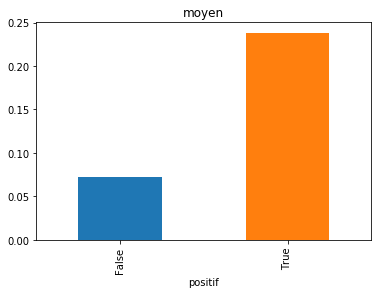

In [107]:
%matplotlib inline
DataBase.groupby(["positif"])["fConc1"].mean().plot.bar(title="moyen")

### Modélisation

In [96]:
#importation des librarie pour éffectuer la modelisation
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [97]:
#verification des données 
df = pd.get_dummies(df)
df.shape

(19020, 11)

In [68]:
#X = dataset.data
#y = dataset.target
X = df[df.columns[:1]]
y = df[df.columns[-1]]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

#### Algorithme modele

In [112]:
#le modele
algo   = RandomForestClassifier(random_state = 42,
                    n_jobs = -1,
                    n_estimators=16,
                    criterion='entropy',
                    max_depth=16
                    )
#Le fit pour x_train et y_train
modele = algo.fit(X_train, y_train)

# La prédiction
y_pred = model.predict(X_test)

#Le resultat
accuracy_score(y_test, y_pred)

0.7207150368033649

### Optimisation des hyperparamètres

In [84]:
from sklearn import grid_search
parameters = {  'gamma' : [0.01, 0.1, 0.5]           ,
                 "probability" : [True]}
grid       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_.score(X_test, y_test)

0.94776119403 0.969696969697


### Visualisation des performances

For model KNN accuracy = 0.7131440588853838


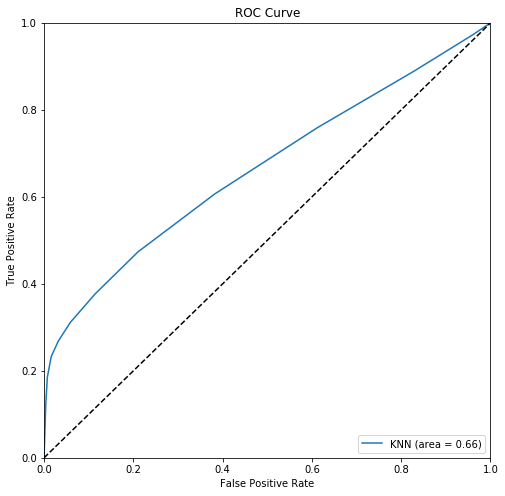

For model NB accuracy = 0.7158780231335437


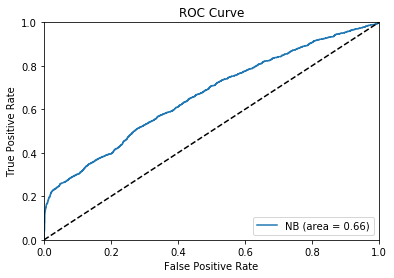

For model RF50 accuracy = 0.6439537329127234


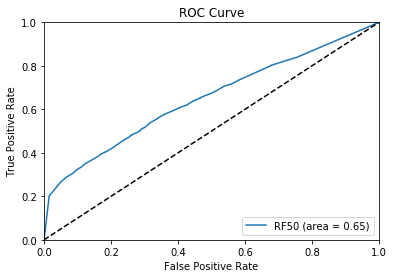

For model AdaBoost accuracy = 0.7390115667718191


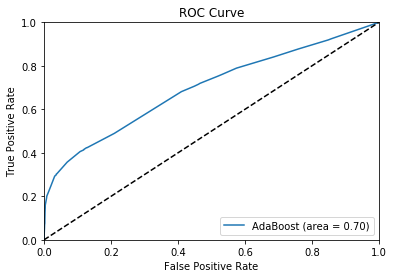

For model RF5 accuracy = 0.6473186119873817


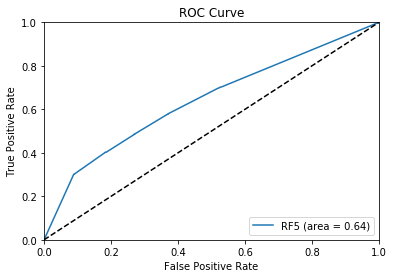

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import roc_curve, auc,fbeta_score, make_scorer,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm, datasets
from sklearn.metrics import roc_auc_score

#Utilisation du classifier 
#Import des librarie

classifiers = {'KNN': KNeighborsClassifier(n_neighbors=11),
               'NB': GaussianNB(),
               'RF5': RandomForestClassifier(n_estimators=5),
               'RF50': RandomForestClassifier(n_estimators=50),
               'AdaBoost': AdaBoostClassifier(),
               }

plt.figure(figsize=(8,8))

#classifier methode
#score teste X_test et y_test via y_pred
n_classifiers = len(classifiers)
for index, (name, clf) in enumerate(classifiers.iteritems()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    print 'For model', name, 'accuracy =', clf.score(X_test, y_test)

    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (name, roc_auc))


    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
